# MaterialsCoord benchmarking – elemental materials scores

Benchmark and plot the results of the near neighbor algorithms on elemental structures.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Hillary Pan, Alex Ganose (10/12/19)*

---

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose the elemental structure set.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["elemental"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the benchmark scores for each algorithm.

In [3]:
scores = bm.score(nn_methods)
scores

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3565: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3380: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
As_alpha_16518,0.000000,0.000000,0.000000,0.0,9.000000,0.0,3.000000,0.0
C_diamond_52054,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
C_graphite_76767,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
Cu_52256,0.000000,0.000000,0.000000,0.0,6.000000,0.0,0.000000,0.0
Ga_12174,0.000000,0.000000,0.000000,0.0,4.000000,0.0,0.000000,0.0
Hg_alpha_104296,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
La_43573,0.000000,0.000000,0.000000,0.0,6.000000,0.0,0.000000,0.0
Mg_52260,0.000000,0.000000,0.000000,12.0,6.000000,0.0,0.000000,0.0
Mn_alpha_42743,7.862069,7.862069,7.862069,0.0,0.827586,0.0,3.724138,0.0
Mn_beta_41775,2.400000,2.400000,2.400000,0.0,1.200000,0.0,0.000000,0.0


Reorder the scores for plotting.

In [4]:
index = ['W_alpha_43667', 'La_43573', 'Mg_52260', 'Cu_52256', 
         'C_diamond_52054', 'Se_trigonal_23068', 'Sn_beta_106072',
         'As_alpha_16518', 'P_black_23836', 'C_graphite_76767', 'Sm_76031',
         'Hg_alpha_104296', 'U_alpha_16056', 'Ga_12174', 
         'Mn_alpha_42743', 'Mn_beta_41775', 'Total']
scores = scores.reindex(index)

Finally, plot the results.

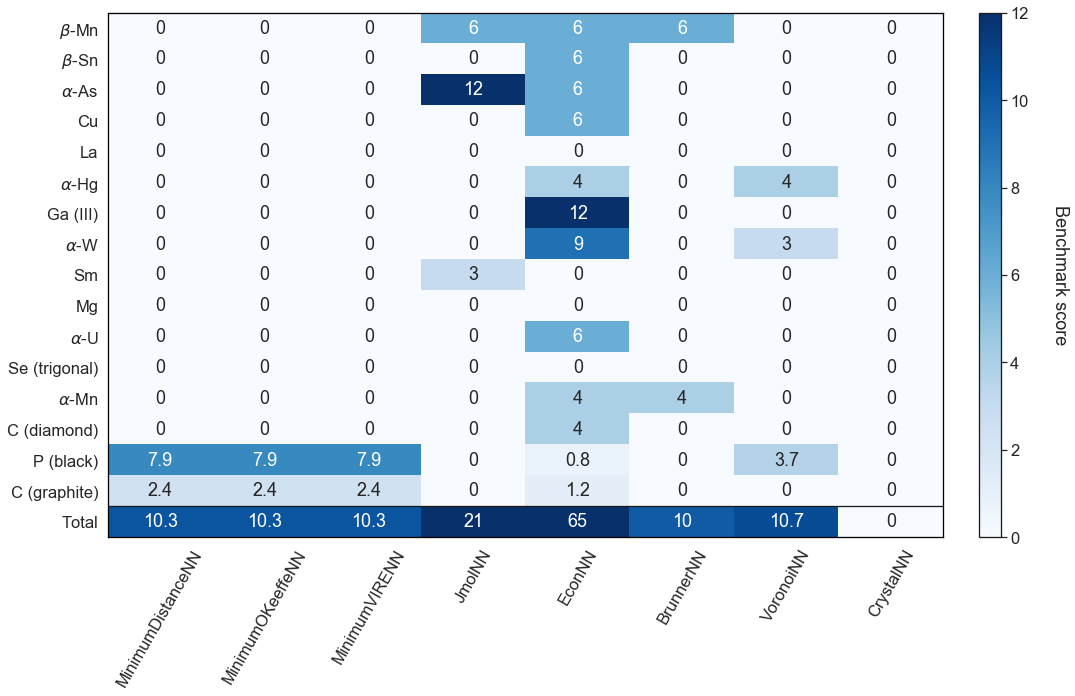

In [6]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    scores,
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "elemental.pdf"), bbox_inches='tight')
plt.show()